In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import math

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMAResults
import statsmodels.api as sm
print('Statsmodel Version: ', sm.__version__)

import tensorflow as tf
print('TensorFlow Version: ', tf.__version__)
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")
import os

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

Statsmodel Version:  0.14.4
TensorFlow Version:  2.17.1


In [ ]:

df = pd.read_csv('global_dataset.csv')

df.head()

,Unnamed: 0,date,co2
0,0,1750-12-31,46.755
1,1,1751-12-31,46.755
2,2,1752-12-31,46.770
3,3,1753-12-31,46.770
4,4,1754-12-31,46.790


In [ ]:

df['co2'] = df['co2']/3.664


fig = px.line(df,
                x = 'date',
                y = 'co2',
                markers = True,
                height = 800,
                width = 1000)

fig.update_layout(title = dict(
        text = 'Total World CO2 Emissions',
        font = dict(
            family = 'Arial',
            size = 30
        ),
        x = 0.5
    )
    )
fig.update_traces(line_color = 'darkblue')

fig.update_xaxes(
    title_text = 'Date',
    title_font = {'size': 20}
)

fig.update_yaxes(
    title_text = 'Million Tonnes of CO2 Emmitted into the Atmosphere',
    title_font = {'size': 20}
)

fig.show()

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0038 - val_loss: 0.0204
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 9.5215e-04 - val_loss: 0.0067
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0012 - val_loss: 0.0125
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.2062e-04 - val_loss: 0.0058
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.9197e-04 - val_loss: 0.0034
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 5.2137e-04 - val_loss: 0.0070
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.0829e-04 - val_loss: 0.0579
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.1802e-04 - val_loss: 0.0503
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.5651e-04 - val_loss: 0.0457
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.9233e-04 - val_loss: 0.0159
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.6011e-04 - val_loss: 0.0082
Epoch 12/50
13/13 ━━━━━━━━━

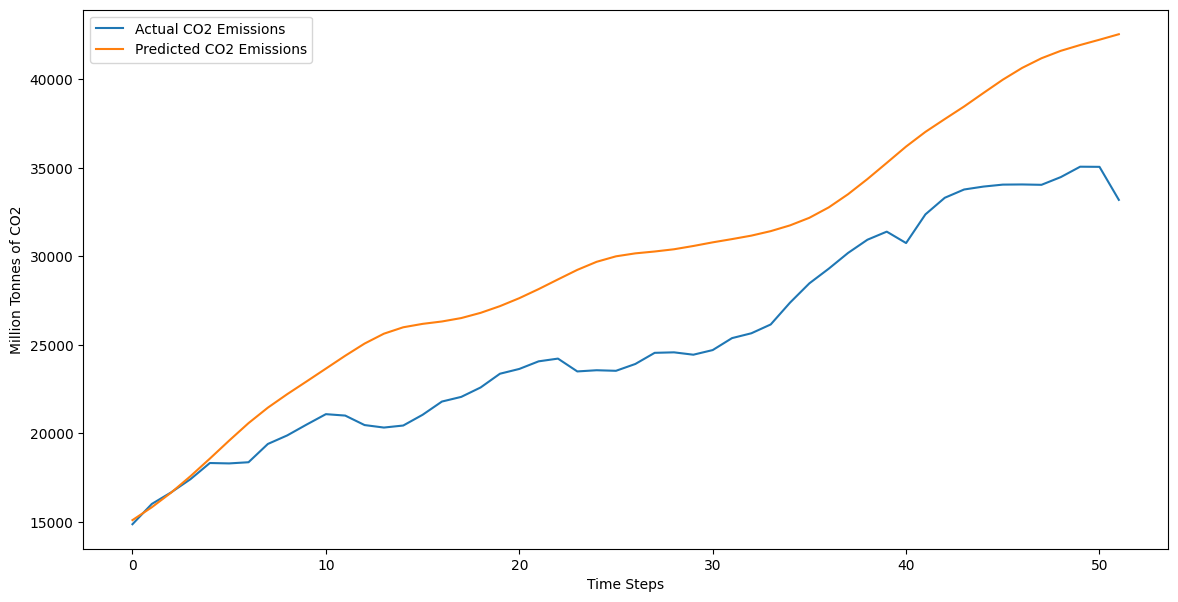

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout, Flatten
import plotly.express as px
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
df['co2_normalized'] = scaler.fit_transform(df[['co2']])

sequence_length = 12

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(df['co2_normalized'].values, sequence_length)
X = np.expand_dims(X, axis=-1)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=50))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled, label='Actual CO2 Emissions')
plt.plot(y_pred_rescaled, label='Predicted CO2 Emissions')
plt.xlabel('Time Steps')
plt.ylabel('Million Tonnes of CO2')
plt.legend()
plt.show()






In [ ]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0178
Test Loss: 0.019154224544763565


In [ ]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

historical_years = df['date'].values
historical_co2 = df['co2'].values

future_years = list(range(2021, 2030))
future_co2 = []

last_window = X_test[-1:]

for _ in range(len(future_years)):

    next_pred = model.predict(last_window)
    future_co2.append(scaler.inverse_transform(next_pred)[0][0])
    last_window = np.append(last_window[:, 1:, :], np.expand_dims(next_pred, axis=2), axis=1)

all_years = np.concatenate((historical_years, future_years))
all_co2 = np.concatenate((historical_co2, future_co2))

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=all_years[:len(historical_years)],
    y=all_co2[:len(historical_years)],
    mode='lines+markers',
    name='Actual CO₂ Emissions',
    line=dict(color='darkblue'),
    marker=dict(size=5)
))

fig.add_trace(go.Scatter(
    x=all_years[len(historical_years):],
    y=all_co2[len(historical_years):],
    mode='lines+markers',
    name='Predicted CO₂ Emissions',
    line=dict(color='red', dash='dash'),
    marker=dict(size=5)
))

fig.update_layout(
    title="World CO₂ Emissions Over Time",
    xaxis=dict(
        title="Year",
        tickmode='array',
        tickvals=[1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100],
        ticktext=[str(year) for year in [1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100]],
    ),
    yaxis=dict(
        title="Million Tonnes of CO₂ Emitted"
    ),
    height=600,
    width=1000
)

fig.update_traces(
    hovertemplate="Year: %{x}<br>CO₂ Emissions: %{y:.2f} Million Tonnes"
)

fig.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 4399.05
Root Mean Squared Error (RMSE): 4850.22
R² Score: 0.29
